In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for signal processing
from scipy import signal
from sklearn.decomposition import FastICA , PCA

In [4]:
import wave
from scipy.io import wavfile

In [14]:
mix =[]
signal_raw=[]
signal =[]
timing =[]

In [54]:
def plotTheWave (fileName):
    mix = wave.open(fileName ,"r")
    # To extract raw audio from Wav file
    signal_raw = mix.readframes(-1)
    signal = np.fromstring(signal_raw,"Int16")
    fs = mix.getframerate()
    timing = np.linspace(0,len(signal)/fs,num=len(signal))
    plt.figure(figsize=(12,2))
    plt.title("Recording")
    plt.plot(timing,signal,c="#3ABFE7")
    plt.ylim(-35000,35000)
    plt.show()
    return signal,fs;

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


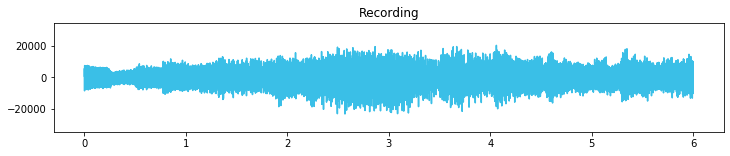

In [55]:
mix1 , fs = plotTheWave("ICA mix 1.wav")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


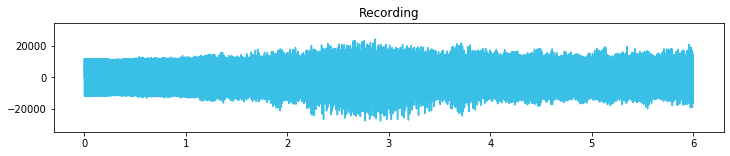

In [42]:
mix2 = plotTheWave("ICA mix 2.wav")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


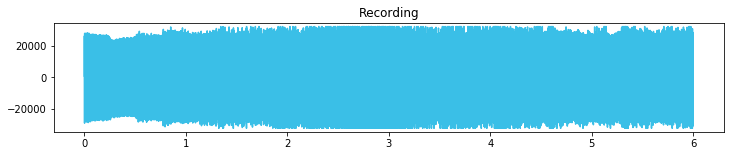

In [43]:
mix3 =plotTheWave("ICA mix 3.wav")

In [44]:
samples = list(zip(mix1,mix2,mix3))

In [45]:
ica_mix = FastICA(n_components=3)
ica_result = ica_mix.fit_transform(samples)
ica_result

array([[-7.26739070e-06,  6.53761627e-04, -1.60227694e-05],
       [-5.21136899e-06,  7.10735986e-04, -1.90663712e-04],
       [-8.92462223e-06,  6.13409873e-04, -3.59639762e-04],
       ...,
       [-2.74511889e-03,  3.95317056e-04, -1.92655467e-03],
       [-2.80419543e-03,  4.06206215e-04, -2.04872233e-03],
       [-2.84506057e-03,  5.35054702e-04, -2.16396881e-03]])

In [48]:
result1 = ica_result[:,0]
result2 = ica_result[:,1]
result3 = ica_result[:,2]

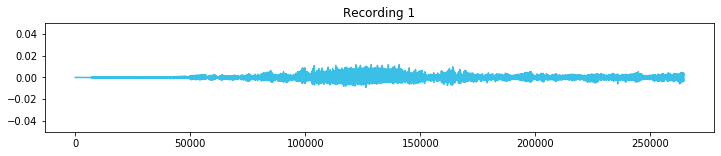

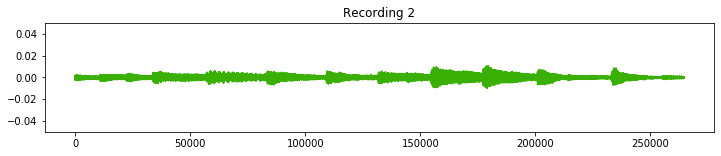

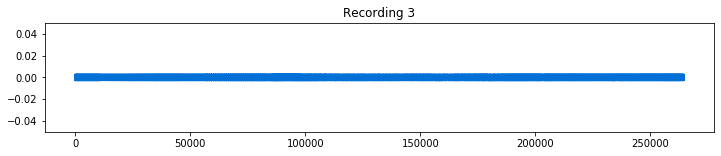

In [52]:
# Result 1
plt.figure(figsize=(12,2))
plt.title("Recording 1")
plt.plot(result1,c="#3ABFE7")
plt.ylim(-0.050,0.05)
plt.show()


# Result 2
plt.figure(figsize=(12,2))
plt.title("Recording 2")
plt.plot(result2,c="#3AB007")
plt.ylim(-0.050,0.05)
plt.show()

# Result 3
plt.figure(figsize=(12,2))
plt.title("Recording 3")
plt.plot(result3,c="#0270D7")
plt.ylim(-0.050,0.05)
plt.show()

In [56]:
# Convert to int , map the appropriate range , and increase the voulume

result_sig_1 = np.int16(result1*32767*100)
result_sig_2 = np.int16(result2*32767*100)
result_sig_3 = np.int16(result3*32767*100)

# Write the Wave files

wavfile.write("result1.wav",fs,result_sig_1)
wavfile.write("result2.wav",fs,result_sig_2)
wavfile.write("result3.wav",fs,result_sig_3)

In [8]:
sampling_rate, mix1 = wavfile.read("ICA mix 1.wav")
sampling_rate, mix2 = wavfile.read("ICA mix 2.wav")
sampling_rate, mix3 = wavfile.read("ICA mix 3.wav")

mixes=[mix1,mix2,mix3]
colors =["red","green","yellow"]
len(mixes)
mix1.g

3

AttributeError: 'int' object has no attribute 'pop'

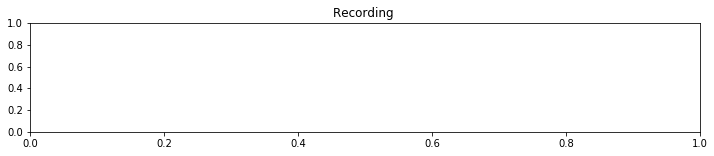

In [10]:
plt.figure(figsize=(12,2))
for i in range(0,len(mixes)):
    fs = mix2.getframerate()
    timing1 = np.linspace(0,len(mixes[i])/fs,num=len(signal2))
    plt.title("Recording ",i)
    plt.subplot(mixes[i],c=colors[i])
    plt.ylim(-100,300)
plt.show()